# Calculate Basic Statistics of the Datasets

In [167]:
import gzip
import json
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,}'.format


In [168]:
DIR = './data'
file_name = os.path.join(DIR, 'australian_user_reviews.json.gz')


In [169]:
def count_lines(file_name):
    print('counting file:', file_name)
    count = 0
    with gzip.open(file_name) as fin:
        for l in fin:
            count += 1
    print('done!')
    return count


In [170]:
n_reviews = count_lines(file_name)


counting file: ./data/australian_user_reviews.json.gz
done!


In [182]:
df_user_stats = pd.DataFrame([n_reviews], dtype = float,
                             columns = ['count'],
                             index = ['No of users'])
display(df_user_stats)


,count
No of users,"25,799.0"


In [183]:
# Bloom Filter to to reduce the inconsistency in the data
records = []

with gzip.open(file_name) as fin:
    for index, line in enumerate(fin):
        decoded_line = line.decode('utf-8').replace('"', ' ').replace("True,", "true,").replace("False,", "false,").replace("'", '"').replace('\\"', "")
        try:
           record = json.JSONDecoder().decode(decoded_line)
           records.append(record)
        except json.JSONDecodeError as e:
            error = f"Error decoding line {index}: {e}"


In [184]:
print(f"Data after Bloom Filter: {len(records)}")


Data after Bloom Filter: 17933


In [174]:
# store the records in json file
with open(os.path.join(DIR, 'dataset.json'), 'w') as fout:
    json.dump(records, fout)

records_df = pd.DataFrame(records)


In [175]:
# create charts and analysis on the data
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


# display the data
display(records_df.head(10))


,user_id,user_url,reviews
0,76561198079601835,http://steamcommunity.com/profiles/76561198079...,"[{'funny': '1 person found this review funny',..."
1,MeaTCompany,http://steamcommunity.com/id/MeaTCompany,"[{'funny': '', 'posted': 'Posted July 24.', 'l..."
2,76561198089393905,http://steamcommunity.com/profiles/76561198089...,"[{'funny': '5 people found this review funny',..."
3,76561198156664158,http://steamcommunity.com/profiles/76561198156...,"[{'funny': '', 'posted': 'Posted June 16.', 'l..."
4,76561198077246154,http://steamcommunity.com/profiles/76561198077...,"[{'funny': '', 'posted': 'Posted June 11.', 'l..."
5,WeiEDKrSat,http://steamcommunity.com/id/WeiEDKrSat,"[{'funny': '', 'posted': 'Posted December 25, ..."
6,thequeenpanda,http://steamcommunity.com/id/thequeenpanda,"[{'funny': '', 'posted': 'Posted June 23, 2012..."
7,Rainbow-Dashie,http://steamcommunity.com/id/Rainbow-Dashie,"[{'funny': '', 'posted': 'Posted June 19, 2015..."
8,devvonst,http://steamcommunity.com/id/devvonst,"[{'funny': '', 'posted': 'Posted February 12, ..."
9,Fr0stedLine,http://steamcommunity.com/id/Fr0stedLine,"[{'funny': '', 'posted': 'Posted February 27.'..."


In [176]:
# Iterate through first 10 records of dataframes
def iterateThroughTop():
  for index, row in records_df.head(5).iterrows():
      user_id = row['user_id']
      user_url = row['user_url']
      num_reviews = len(row['reviews'])

      print(f"User ID: {user_id}")
      print(f"User URL: {user_url}")
      print(f"Number of Reviews: {num_reviews}")

      # Additional analysis can be added here based on your requirements

      # Example: Extract review text and print them
      for review in row['reviews']:
          review_text = review['review']
          print(f"Review: {review_text}")

      print("=" * 30)


In [177]:
# Average rating
records_df['recommend'] = records_df['reviews'].apply(
    lambda x: x[0]['recommend'] if x else None)

average_rating = records_df['recommend'].mean()

# average rating in percentage
print(f"Average Rating: {average_rating * 100:.2f}%")

# Number of reviews per user
reviews_per_user = records_df.groupby(
    'user_id').size().reset_index(name='num_reviews')

# User with the most reviews
user_with_most_reviews = reviews_per_user.loc[reviews_per_user['num_reviews'].idxmax(
)]

print(f"\nUser with the most reviews:")
print(f"User ID: {user_with_most_reviews['user_id']}")
print(f"Number of Reviews: {user_with_most_reviews['num_reviews']}")


Average Rating: 90.67%

User with the most reviews:
User ID: 76561198045953692
Number of Reviews: 3


In [181]:
# Console Outputs

display(records_df.head(10))

iterateThroughTop()

print(f"\nUser with the most reviews:")
print(f"User ID: {user_with_most_reviews['user_id']}")
print(f"Number of Reviews: {user_with_most_reviews['num_reviews']}")


,user_id,user_url,reviews,recommend
0,76561198079601835,http://steamcommunity.com/profiles/76561198079...,"[{'funny': '1 person found this review funny',...",True
1,MeaTCompany,http://steamcommunity.com/id/MeaTCompany,"[{'funny': '', 'posted': 'Posted July 24.', 'l...",True
2,76561198089393905,http://steamcommunity.com/profiles/76561198089...,"[{'funny': '5 people found this review funny',...",True
3,76561198156664158,http://steamcommunity.com/profiles/76561198156...,"[{'funny': '', 'posted': 'Posted June 16.', 'l...",True
4,76561198077246154,http://steamcommunity.com/profiles/76561198077...,"[{'funny': '', 'posted': 'Posted June 11.', 'l...",True
5,WeiEDKrSat,http://steamcommunity.com/id/WeiEDKrSat,"[{'funny': '', 'posted': 'Posted December 25, ...",True
6,thequeenpanda,http://steamcommunity.com/id/thequeenpanda,"[{'funny': '', 'posted': 'Posted June 23, 2012...",True
7,Rainbow-Dashie,http://steamcommunity.com/id/Rainbow-Dashie,"[{'funny': '', 'posted': 'Posted June 19, 2015...",True
8,devvonst,http://steamcommunity.com/id/devvonst,"[{'funny': '', 'posted': 'Posted February 12, ...",True
9,Fr0stedLine,http://steamcommunity.com/id/Fr0stedLine,"[{'funny': '', 'posted': 'Posted February 27.'...",True


User ID: 76561198079601835
User URL: http://steamcommunity.com/profiles/76561198079601835
Number of Reviews: 1
Review: ZIKA DO BAILE
User ID: MeaTCompany
User URL: http://steamcommunity.com/id/MeaTCompany
Number of Reviews: 1
Review: BEST GAME IN THE BLOODY WORLD
User ID: 76561198089393905
User URL: http://steamcommunity.com/profiles/76561198089393905
Number of Reviews: 2
Review: Killed the Emperor, nobody cared and got away with it. Accidentally killed a chicken and everybody decided to gang up on me. 10/10
Review: 10/10 would eat your money for hats and keys
User ID: 76561198156664158
User URL: http://steamcommunity.com/profiles/76561198156664158
Number of Reviews: 1
Review: love it
User ID: 76561198077246154
User URL: http://steamcommunity.com/profiles/76561198077246154
Number of Reviews: 2
Review: mt bom
Review: É muito bom

User with the most reviews:
User ID: 76561198045953692
Number of Reviews: 3


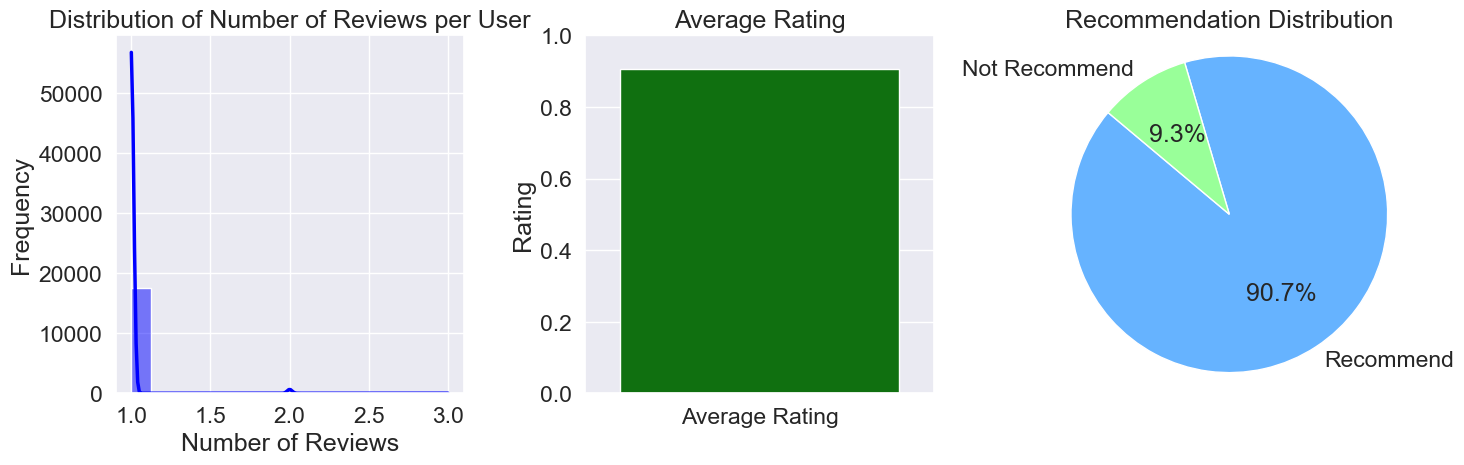

In [179]:
# 1: Distribution of Number of Reviews
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)  # Create first subplot
sns.histplot(reviews_per_user['num_reviews'], kde=True, color='blue')
plt.title('Distribution of Number of Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# 2: Bar chart for Average Rating
plt.subplot(1, 3, 2)
sns.barplot(x=['Average Rating'], y=[average_rating], color='green')
plt.title('Average Rating')
plt.ylabel('Rating')
plt.ylim(0, 1)

# 3: Pie chart for Recommend/Not Recommend distribution
plt.subplot(1, 3, 3)
recommend_counts = records_df['recommend'].value_counts()
plt.pie(recommend_counts, labels=['Recommend', 'Not Recommend'],
        autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99'])
plt.title('Recommendation Distribution')
plt.axis('equal')

plt.tight_layout()
plt.show()
